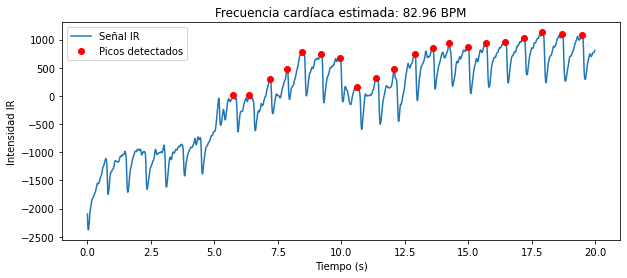

Frecuencia cardíaca estimada: 82.96 BPM


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Cargar los datos
ruta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_95_77_2.csv"
df = pd.read_csv(ruta, delimiter=';')

# Extraer tiempo e IR
tiempo = df['Tiempo (ms)'].values  # En milisegundos
ir_signal = df['IR'].values  

# Normalizar tiempo a segundos
tiempo = (tiempo - tiempo[0]) / 1000  

# Filtrado simple (opcional, según cómo se vea la señal)
ir_signal = ir_signal - np.mean(ir_signal)  # Centrar la señal

# Detectar picos
picos, _ = find_peaks(ir_signal, height=np.mean(ir_signal), distance=30)  

# Calcular intervalos RR (tiempo entre picos)
intervalos_rr = np.diff(tiempo[picos])  # En segundos

# Calcular frecuencia cardíaca
hr = 60 / np.mean(intervalos_rr)  

# Graficar la señal con los picos detectados
plt.figure(figsize=(10, 4))
plt.plot(tiempo, ir_signal, label="Señal IR")
plt.plot(tiempo[picos], ir_signal[picos], "ro", label="Picos detectados")
plt.xlabel("Tiempo (s)")
plt.ylabel("Intensidad IR")
plt.legend()
plt.title(f"Frecuencia cardíaca estimada: {hr:.2f} BPM")
plt.show()

print(f"Frecuencia cardíaca estimada: {hr:.2f} BPM")


raw_data_91_91.csv → Frecuencia cardíaca estimada: 89.28 BPM


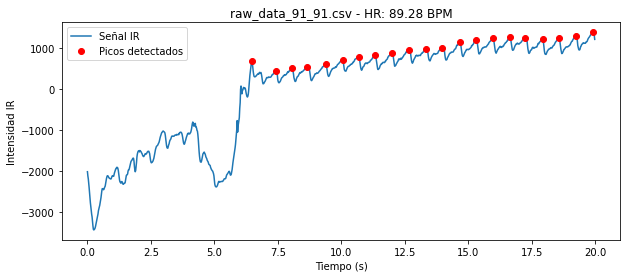

raw_data_92_76.csv → Frecuencia cardíaca estimada: 84.56 BPM


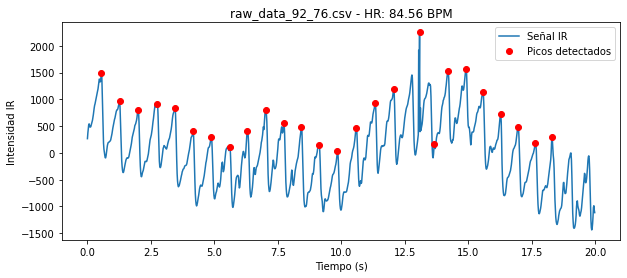

raw_data_93_100.csv → Frecuencia cardíaca estimada: 64.18 BPM


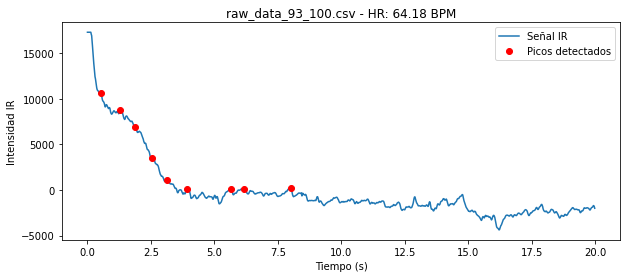

raw_data_95_77_2.csv → Frecuencia cardíaca estimada: 82.96 BPM


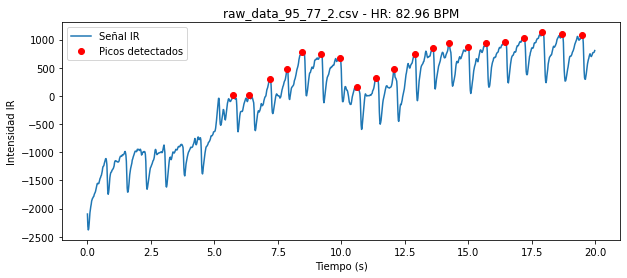

raw_data_95_80.csv → Frecuencia cardíaca estimada: 43.93 BPM


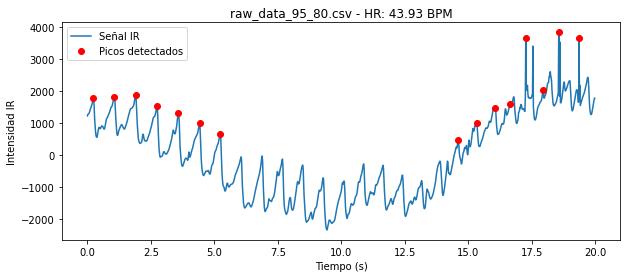

raw_data_95_81_papa.csv → Frecuencia cardíaca estimada: 80.41 BPM


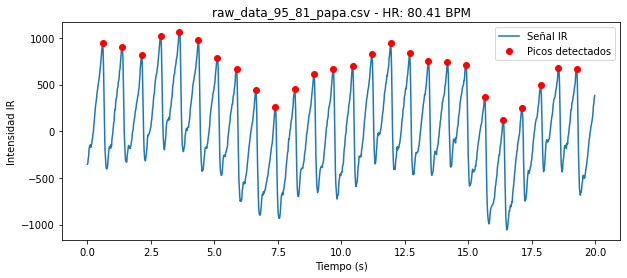

raw_data_95_99.csv → Frecuencia cardíaca estimada: 60.29 BPM


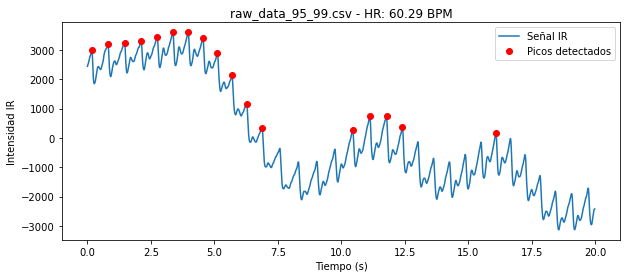

raw_data_96_106.csv → Frecuencia cardíaca estimada: 95.30 BPM


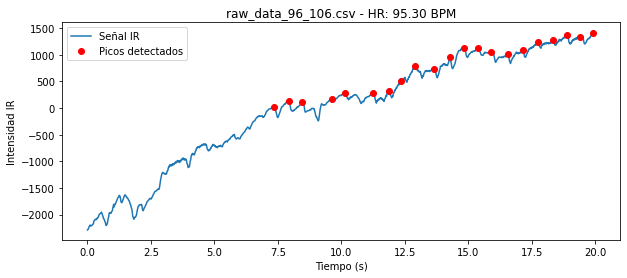

raw_data_96_69.csv → Frecuencia cardíaca estimada: 69.63 BPM


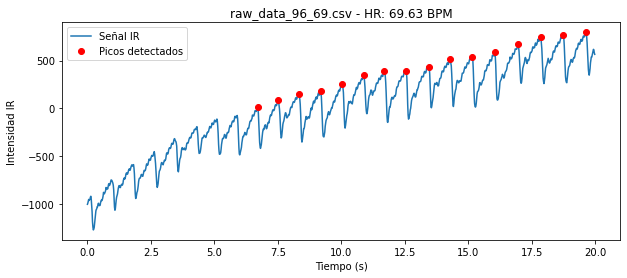

raw_data_97_119.csv → Frecuencia cardíaca estimada: 104.34 BPM


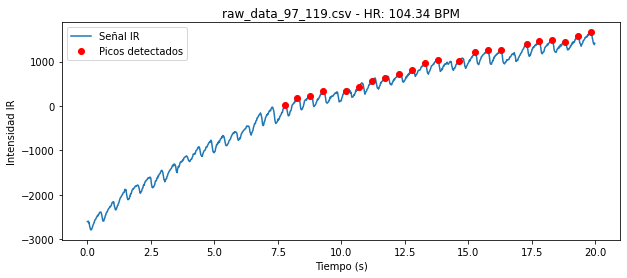

raw_data_98_81.csv → Frecuencia cardíaca estimada: 65.05 BPM


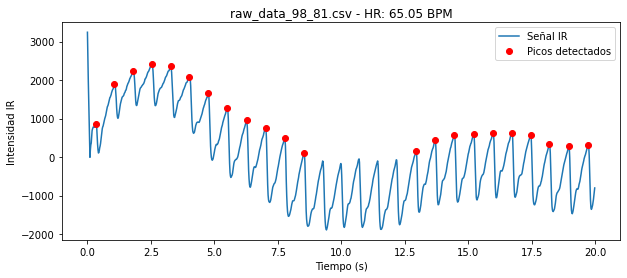

raw_data_98_91.csv → Frecuencia cardíaca estimada: 96.68 BPM


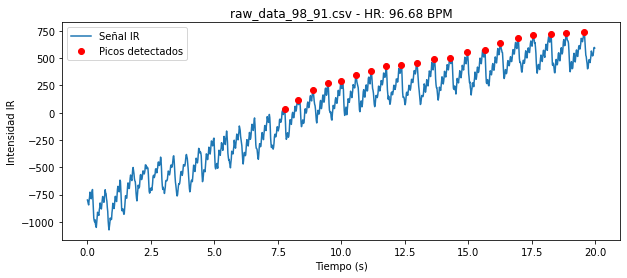

raw_data_99_75.csv → Frecuencia cardíaca estimada: 75.12 BPM


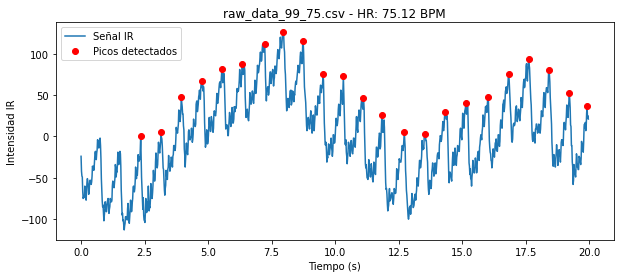

raw_data_99_91.csv → Frecuencia cardíaca estimada: 34.67 BPM


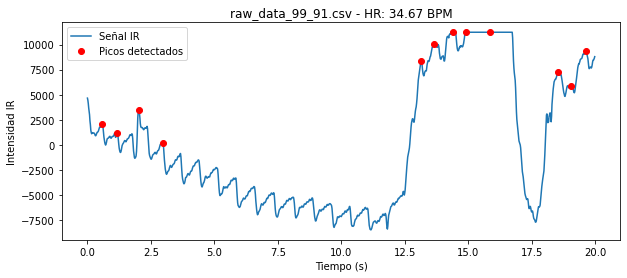

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

# Ruta de la carpeta con los archivos procesados
ruta_carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados"

# Recorrer todos los archivos CSV en la carpeta
for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith(".csv"):
        ruta_archivo = os.path.join(ruta_carpeta, archivo)

        # Cargar los datos
        df = pd.read_csv(ruta_archivo, delimiter=';')

        # Extraer tiempo e IR
        tiempo = df['Tiempo (ms)'].values
        ir_signal = df['IR'].values  

        # Normalizar tiempo a segundos
        tiempo = (tiempo - tiempo[0]) / 1000  

        # Centrar la señal (eliminar offset)
        ir_signal = ir_signal - np.mean(ir_signal)  

        # Detectar picos
        picos, _ = find_peaks(ir_signal, height=np.mean(ir_signal), distance=30)  

        # Si hay suficientes picos, calcular HR
        if len(picos) > 1:
            intervalos_rr = np.diff(tiempo[picos])  # Diferencias entre picos (en s)
            hr = 60 / np.mean(intervalos_rr)  # BPM
        else:
            hr = np.nan  # Si no hay suficientes picos, marcar como NaN

        # Imprimir el nombre del archivo y la HR estimada
        print(f"{archivo} → Frecuencia cardíaca estimada: {hr:.2f} BPM")

        # Graficar la señal con los picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, ir_signal, label="Señal IR")
        plt.plot(tiempo[picos], ir_signal[picos], "ro", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad IR")
        plt.legend()
        plt.title(f"{archivo} - HR: {hr:.2f} BPM")
        plt.show()


## Quitando solamente los primeros 5s

In [2]:
import pandas as pd
import os

# Rutas de entrada y salida
ruta_entrada = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"
ruta_salida = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2"

# Asegurar que la carpeta de salida existe
os.makedirs(ruta_salida, exist_ok=True)

# Procesar cada archivo en la carpeta de entrada
for archivo in os.listdir(ruta_entrada):
    if archivo.endswith(".csv"):
        ruta_archivo = os.path.join(ruta_entrada, archivo)
        df = pd.read_csv(ruta_archivo, delimiter=';')

        # Obtener el tiempo inicial y eliminar los primeros 5 segundos
        tiempo_inicial = df['Tiempo (ms)'].iloc[0]
        df_filtrado = df[df['Tiempo (ms)'] >= tiempo_inicial + 5000]

        # Guardar el nuevo CSV en la carpeta de salida
        ruta_guardado = os.path.join(ruta_salida, archivo)
        df_filtrado.to_csv(ruta_guardado, index=False, sep=';')

        print(f"Procesado: {archivo} → Guardado en {ruta_guardado}")

print(" Todos los archivos han sido procesados y guardados en 'Procesados 2'.")


Procesado: raw_data_91_91.csv → Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2\raw_data_91_91.csv
Procesado: raw_data_92_76.csv → Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2\raw_data_92_76.csv
Procesado: raw_data_93_100.csv → Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2\raw_data_93_100.csv
Procesado: raw_data_95_77_2.csv → Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2\raw_data_95_77_2.csv
Procesado: raw_data_95_80.csv → Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2\raw_data_95_80.csv
Procesado: raw_data_95_81_papa.csv → Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2\raw_data_95_81_papa.csv
Procesado: raw_data_95_99.csv → Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2\raw_data_95_99.csv
Procesado: raw_data_96_106.csv → Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos

raw_data_91_91.csv → Frecuencia cardíaca estimada: 90.39 BPM


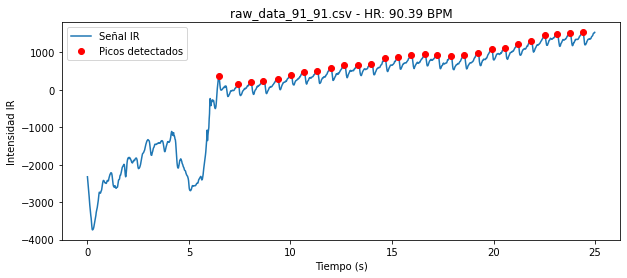

raw_data_92_76.csv → Frecuencia cardíaca estimada: 82.33 BPM


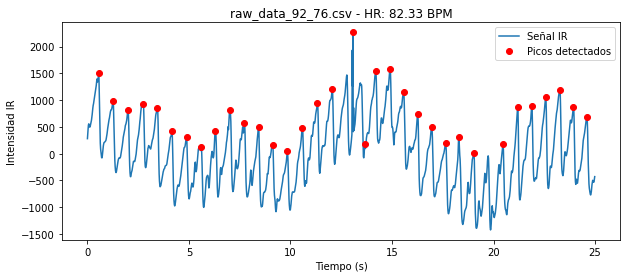

raw_data_93_100.csv → Frecuencia cardíaca estimada: 92.76 BPM


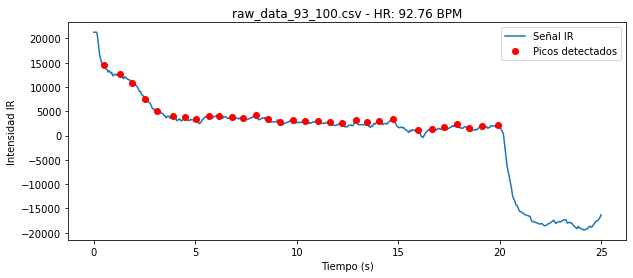

raw_data_95_77_2.csv → Frecuencia cardíaca estimada: 80.95 BPM


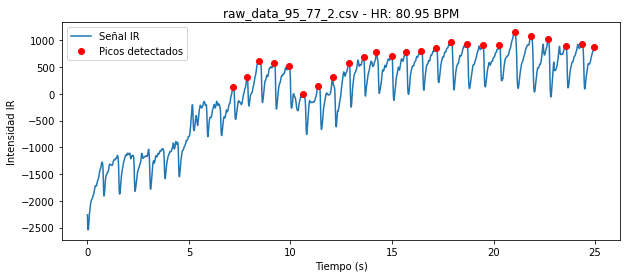

raw_data_95_80.csv → Frecuencia cardíaca estimada: 53.58 BPM


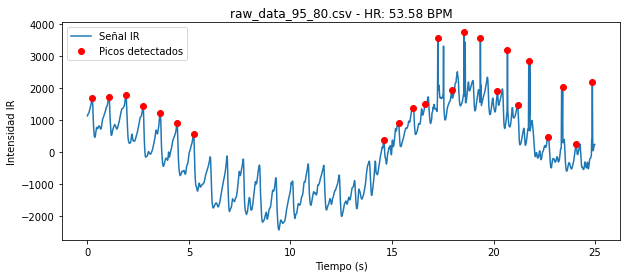

raw_data_95_81_papa.csv → Frecuencia cardíaca estimada: 76.00 BPM


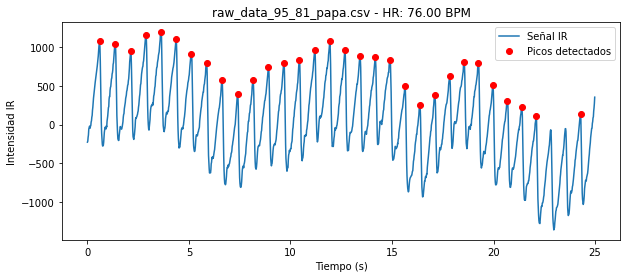

raw_data_95_99.csv → Frecuencia cardíaca estimada: 76.41 BPM


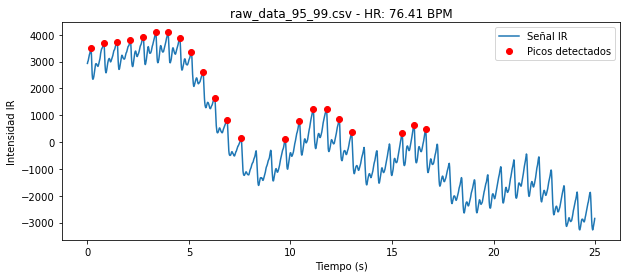

raw_data_96_106.csv → Frecuencia cardíaca estimada: 100.34 BPM


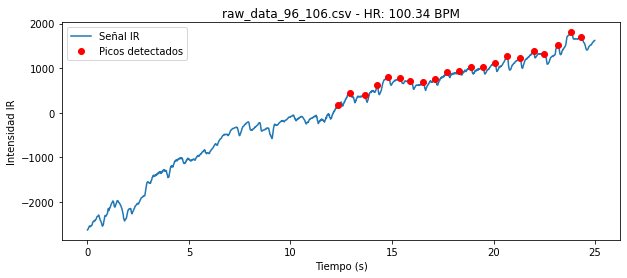

raw_data_96_69.csv → Frecuencia cardíaca estimada: 69.91 BPM


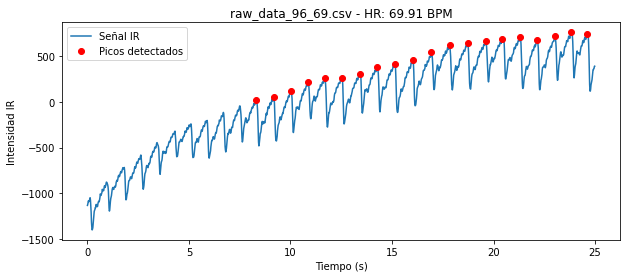

raw_data_97_119.csv → Frecuencia cardíaca estimada: 101.24 BPM


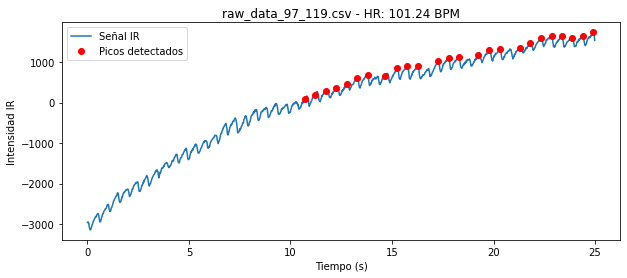

raw_data_98_81.csv → Frecuencia cardíaca estimada: 78.15 BPM


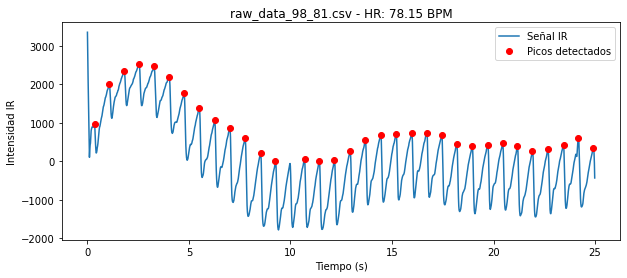

raw_data_98_91.csv → Frecuencia cardíaca estimada: 94.23 BPM


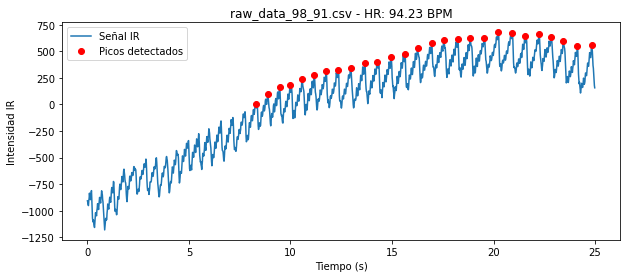

raw_data_99_75.csv → Frecuencia cardíaca estimada: 74.49 BPM


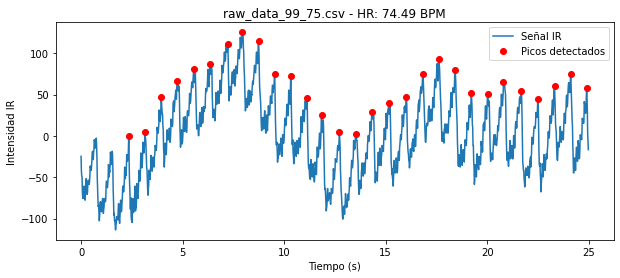

raw_data_99_91.csv → Frecuencia cardíaca estimada: 37.89 BPM


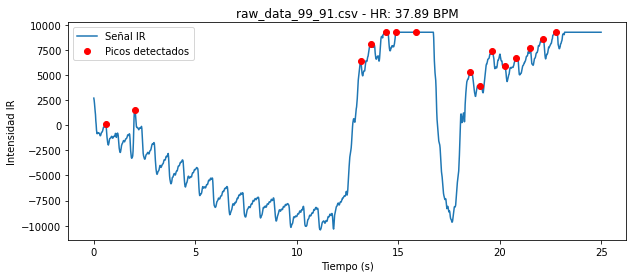

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

# Ruta de la carpeta con los archivos reprocesados
ruta_carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2"

# Recorrer todos los archivos CSV en la carpeta
for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith(".csv"):
        ruta_archivo = os.path.join(ruta_carpeta, archivo)

        # Cargar los datos
        df = pd.read_csv(ruta_archivo, delimiter=';')

        # Extraer tiempo e IR
        tiempo = df['Tiempo (ms)'].values
        ir_signal = df['IR'].values  

        # Normalizar tiempo a segundos
        tiempo = (tiempo - tiempo[0]) / 1000  

        # Centrar la señal (eliminar offset)
        ir_signal = ir_signal - np.mean(ir_signal)  

        # Detectar picos
        picos, _ = find_peaks(ir_signal, height=np.mean(ir_signal), distance=30)  

        # Si hay suficientes picos, calcular HR
        if len(picos) > 1:
            intervalos_rr = np.diff(tiempo[picos])  # Diferencias entre picos (en s)
            hr = 60 / np.mean(intervalos_rr)  # BPM
        else:
            hr = np.nan  # Si no hay suficientes picos, marcar como NaN

        # Imprimir el nombre del archivo y la HR estimada
        print(f"{archivo} → Frecuencia cardíaca estimada: {hr:.2f} BPM")

        # Graficar la señal con los picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, ir_signal, label="Señal IR")
        plt.plot(tiempo[picos], ir_signal[picos], "ro", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad IR")
        plt.legend()
        plt.title(f"{archivo} - HR: {hr:.2f} BPM")
        plt.show()


raw_data_91_91.csv → Frecuencia cardíaca estimada (FFT): 36.02 BPM


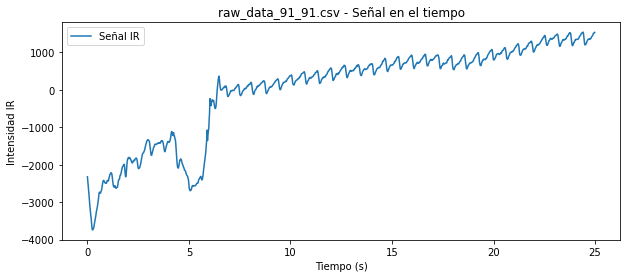

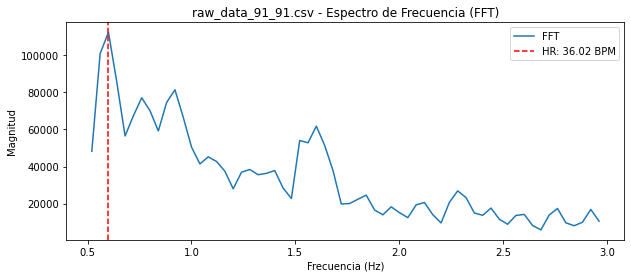

raw_data_92_76.csv → Frecuencia cardíaca estimada (FFT): 84.06 BPM


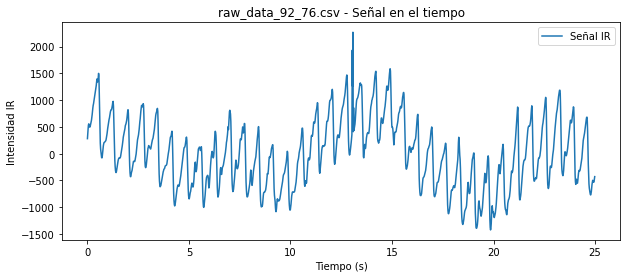

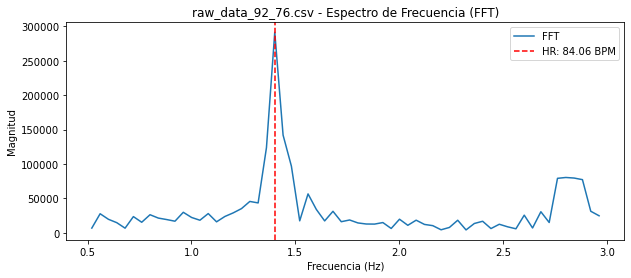

raw_data_93_100.csv → Frecuencia cardíaca estimada (FFT): 33.62 BPM


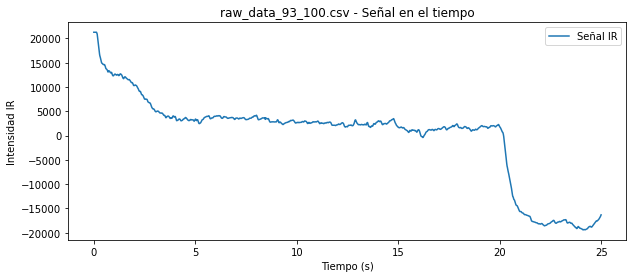

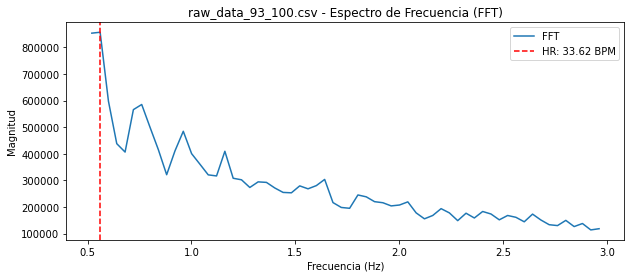

raw_data_95_77_2.csv → Frecuencia cardíaca estimada (FFT): 84.06 BPM


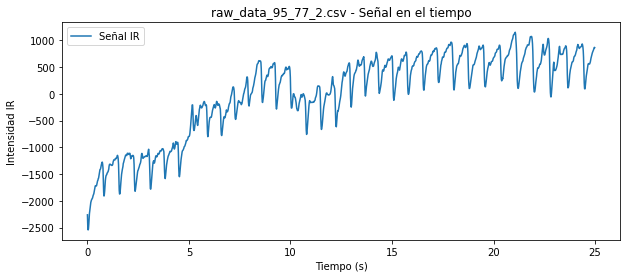

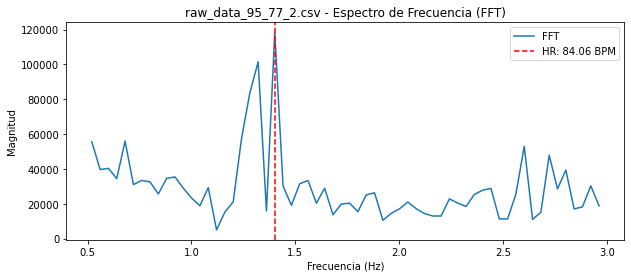

raw_data_95_80.csv → Frecuencia cardíaca estimada (FFT): 72.05 BPM


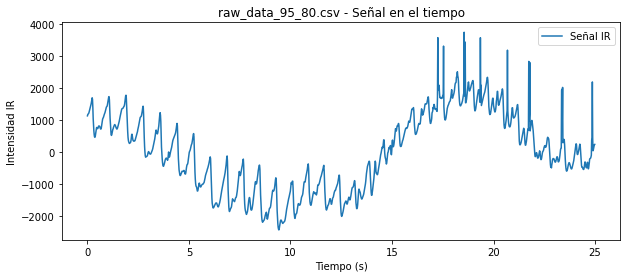

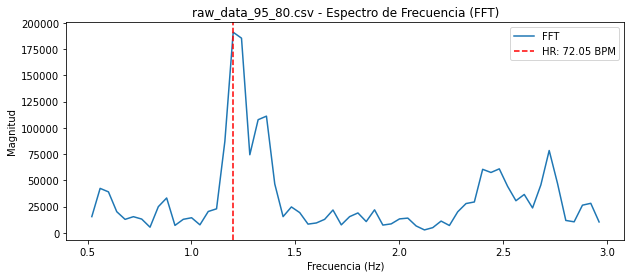

raw_data_95_81_papa.csv → Frecuencia cardíaca estimada (FFT): 81.66 BPM


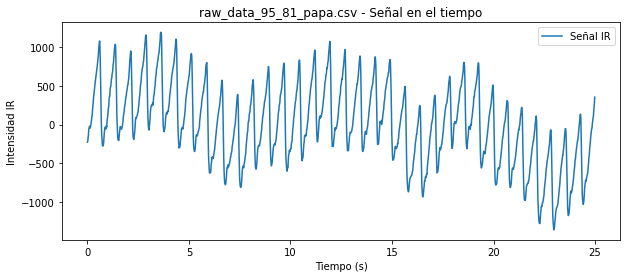

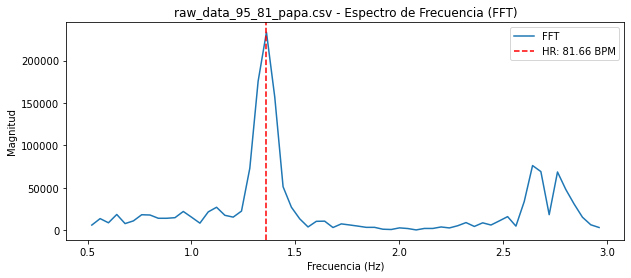

raw_data_95_99.csv → Frecuencia cardíaca estimada (FFT): 98.47 BPM


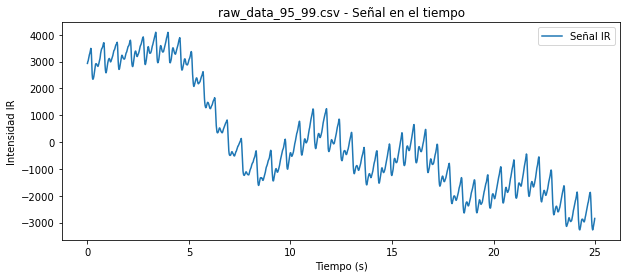

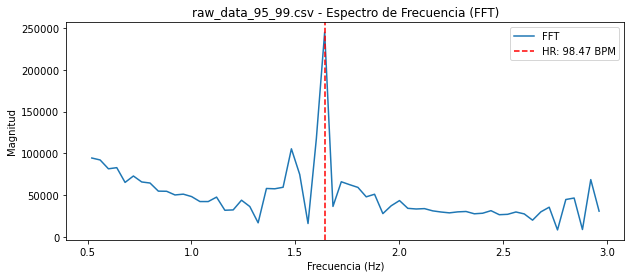

raw_data_96_106.csv → Frecuencia cardíaca estimada (FFT): 31.22 BPM


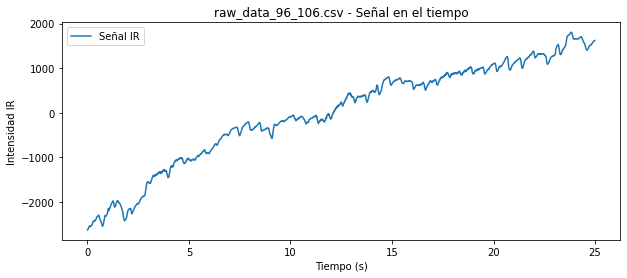

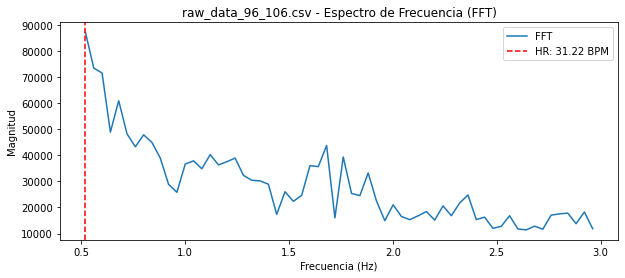

raw_data_96_69.csv → Frecuencia cardíaca estimada (FFT): 69.65 BPM


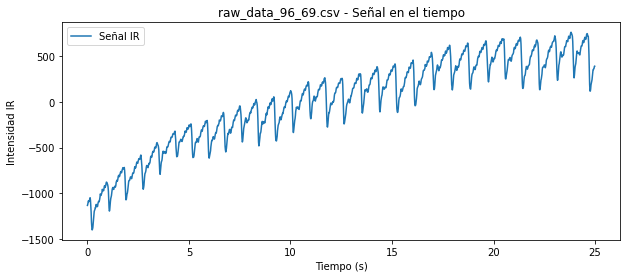

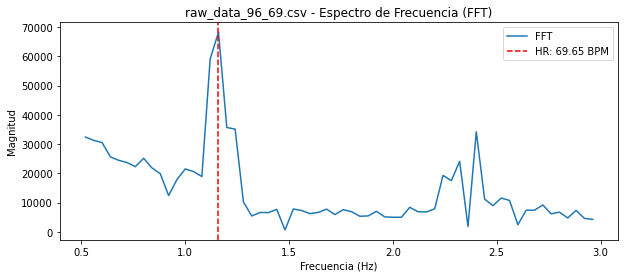

raw_data_97_119.csv → Frecuencia cardíaca estimada (FFT): 33.62 BPM


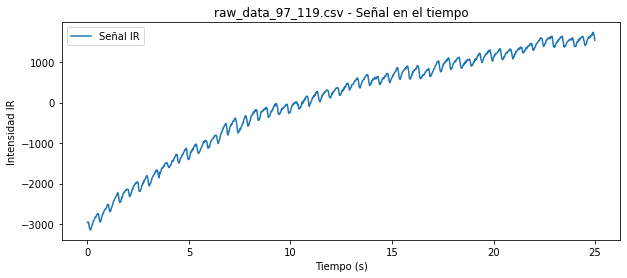

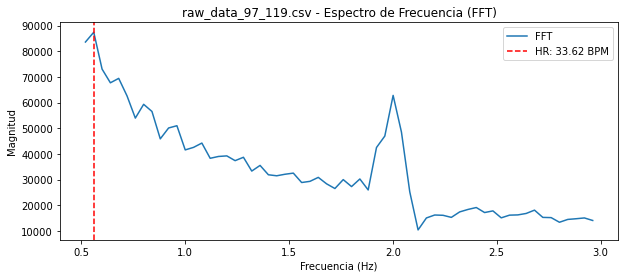

raw_data_98_81.csv → Frecuencia cardíaca estimada (FFT): 79.25 BPM


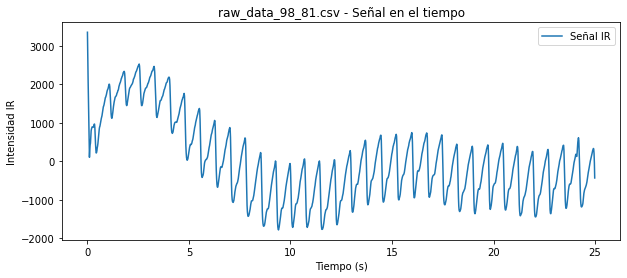

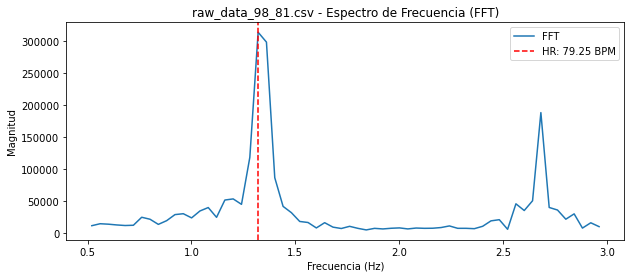

raw_data_98_91.csv → Frecuencia cardíaca estimada (FFT): 91.26 BPM


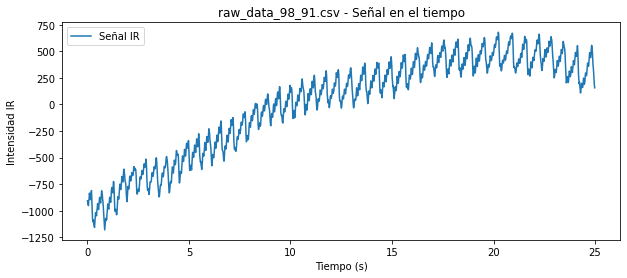

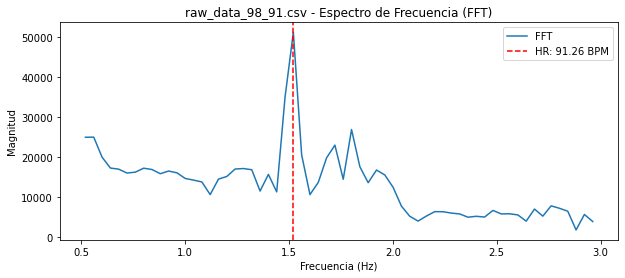

raw_data_99_75.csv → Frecuencia cardíaca estimada (FFT): 74.45 BPM


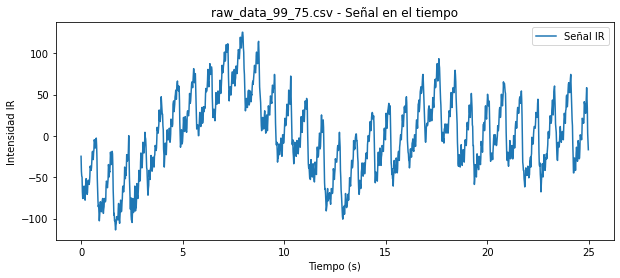

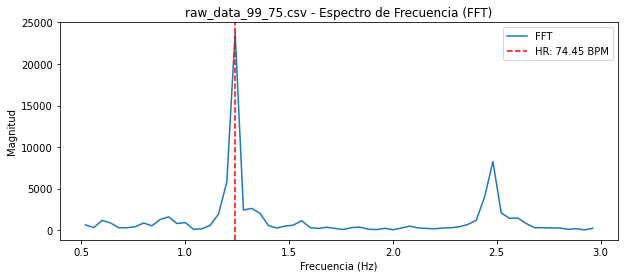

raw_data_99_91.csv → Frecuencia cardíaca estimada (FFT): 36.02 BPM


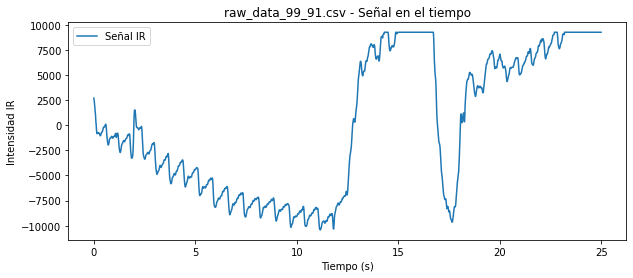

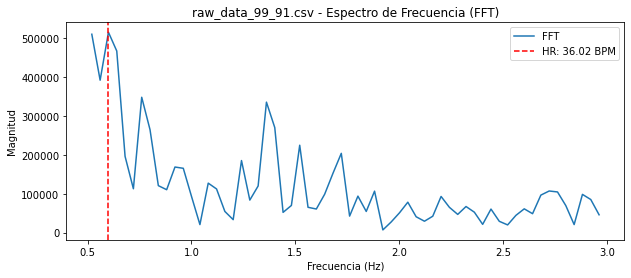

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.fftpack import fft

# Ruta de la carpeta con los archivos reprocesados
ruta_carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados 2"

# Recorrer todos los archivos CSV en la carpeta
for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith(".csv"):
        ruta_archivo = os.path.join(ruta_carpeta, archivo)

        # Cargar los datos
        df = pd.read_csv(ruta_archivo, delimiter=';')

        # Extraer tiempo e IR
        tiempo = df['Tiempo (ms)'].values
        ir_signal = df['IR'].values  

        # Normalizar tiempo a segundos
        tiempo = (tiempo - tiempo[0]) / 1000  
        duracion = tiempo[-1] - tiempo[0]  # Duración total de la señal en segundos
        fs = len(tiempo) / duracion  # Frecuencia de muestreo (Hz)

        # Centrar la señal (eliminar offset)
        ir_signal = ir_signal - np.mean(ir_signal)  

        # Aplicar FFT
        N = len(ir_signal)
        fft_signal = np.abs(fft(ir_signal))[:N//2]  # Tomamos solo la mitad positiva
        freqs = np.fft.fftfreq(N, d=1/fs)[:N//2]  # Frecuencias correspondientes

        # Encontrar la frecuencia dominante en el rango cardíaco (0.5 - 3 Hz)
        mask = (freqs > 0.5) & (freqs < 3)
        freq_dominante = freqs[mask][np.argmax(fft_signal[mask])]  # Máximo en el rango
        hr_fft = freq_dominante * 60  # Convertir a BPM

        # Imprimir el resultado
        print(f"{archivo} → Frecuencia cardíaca estimada (FFT): {hr_fft:.2f} BPM")

        # Graficar la señal en el dominio del tiempo
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, ir_signal, label="Señal IR")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad IR")
        plt.title(f"{archivo} - Señal en el tiempo")
        plt.legend()
        plt.show()

        # Graficar la FFT
        plt.figure(figsize=(10, 4))
        plt.plot(freqs[mask], fft_signal[mask], label="FFT")
        plt.xlabel("Frecuencia (Hz)")
        plt.ylabel("Magnitud")
        plt.title(f"{archivo} - Espectro de Frecuencia (FFT)")
        plt.axvline(freq_dominante, color='r', linestyle='--', label=f"HR: {hr_fft:.2f} BPM")
        plt.legend()
        plt.show()
